# UNEMPLOYMENT ANALYSIS WITH PYTHON

### Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate can be a good data science project. 

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV,KFold 
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\ADMIN\Downloads\oasis\codes\Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
df.shape

(754, 7)

In [4]:
df.isnull().sum()

Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64

##### Since there are in total 28 rows gap between the dataset ,so we can drop these null values

In [5]:
df = df.dropna()
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [6]:
df.shape

(740, 7)

In [7]:
df.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [9]:
df["Frequency"].unique()

array([' Monthly', 'Monthly'], dtype=object)

##### Since the Frequency column only has a single data we can drop the column Freqiency

In [10]:
df = df.drop("Frequency",axis=1)
df.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,5.17,12256762.0,44.68,Rural


In [11]:
df["Region"].nunique()

28

In [12]:
df["Month"] = df["Date"].apply(lambda x: int(x.split("-")[1]))
df["Year"] = df["Date"].apply(lambda x: int(x.split("-")[2]))

In [13]:
df = df.drop("Date",axis=1)
df.head()

,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month,Year
0,Andhra Pradesh,3.65,11999139.0,43.24,Rural,5,2019
1,Andhra Pradesh,3.05,11755881.0,42.05,Rural,6,2019
2,Andhra Pradesh,3.75,12086707.0,43.50,Rural,7,2019
3,Andhra Pradesh,3.32,12285693.0,43.97,Rural,8,2019
4,Andhra Pradesh,5.17,12256762.0,44.68,Rural,9,2019


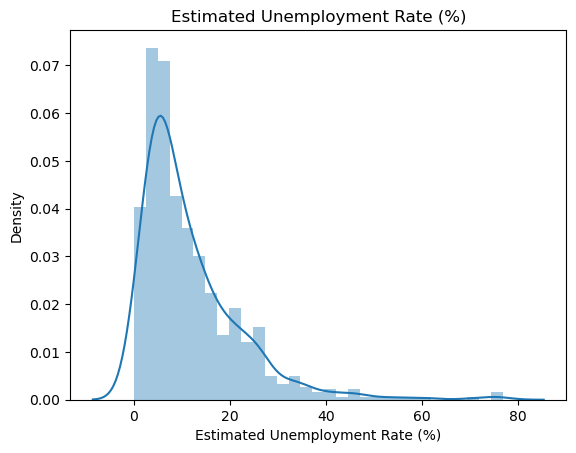

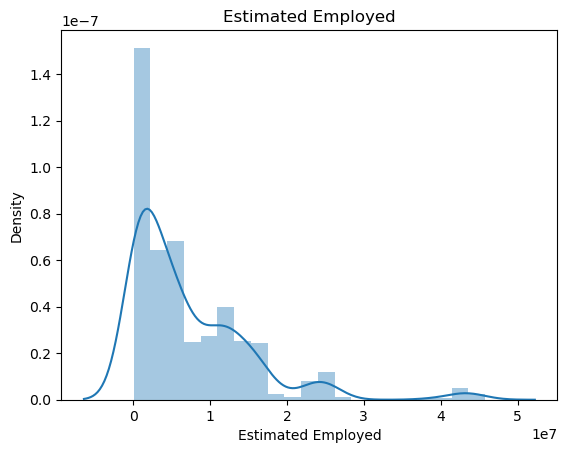

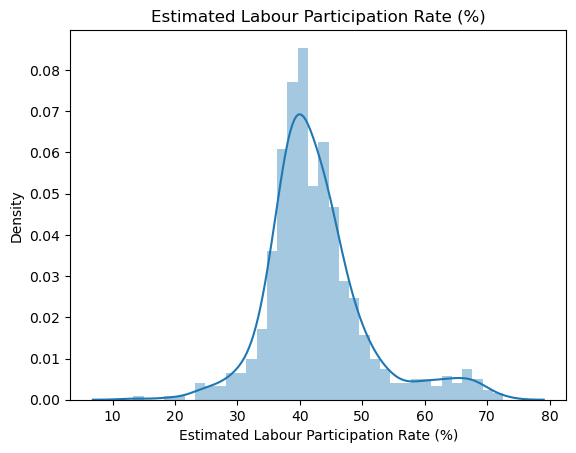

In [14]:
for i in ("Estimated Unemployment Rate (%)","Estimated Employed","Estimated Labour Participation Rate (%)"):
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

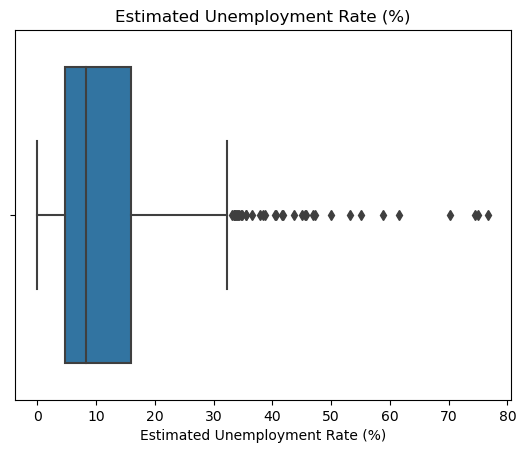

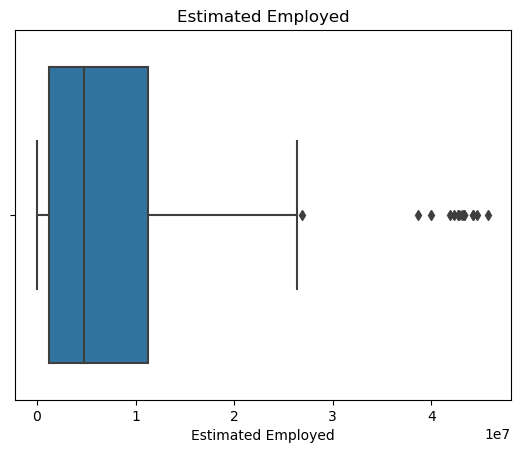

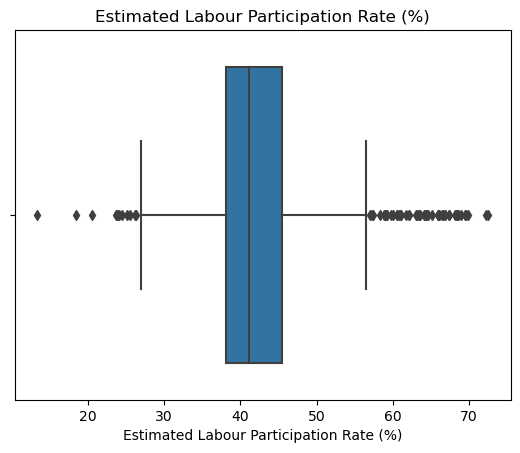

In [15]:
for i in ("Estimated Unemployment Rate (%)","Estimated Employed","Estimated Labour Participation Rate (%)"):
    sns.boxplot(x = df[i])
    plt.title(i)
    plt.show()

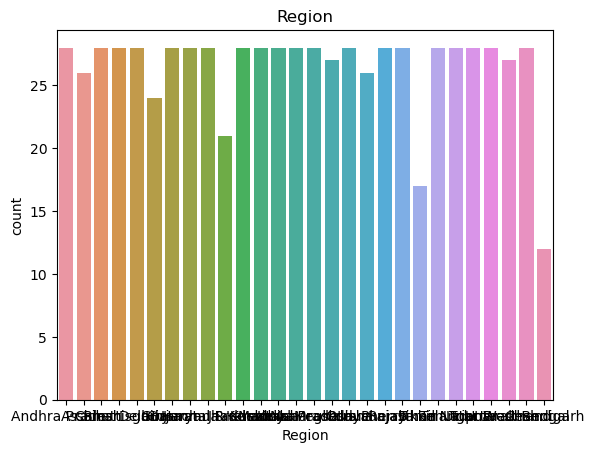

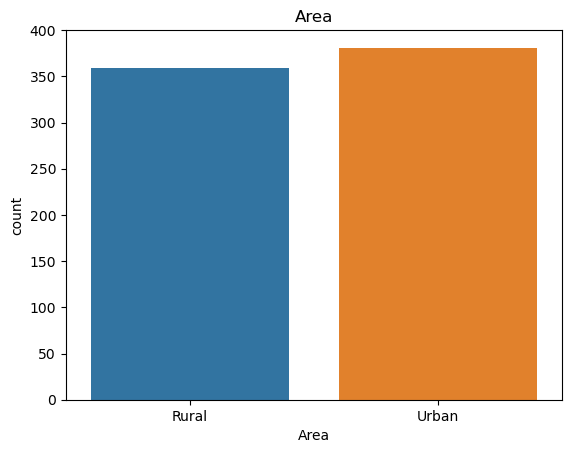

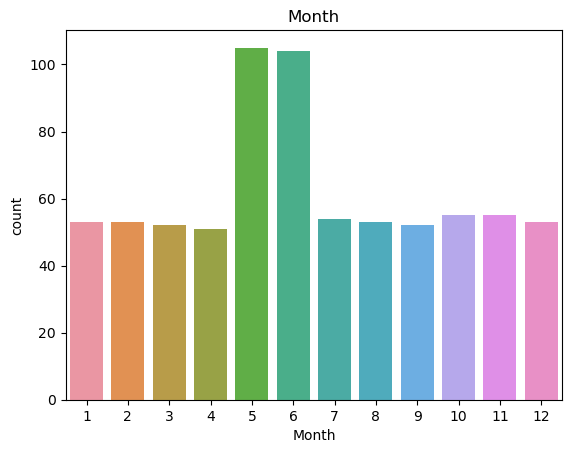

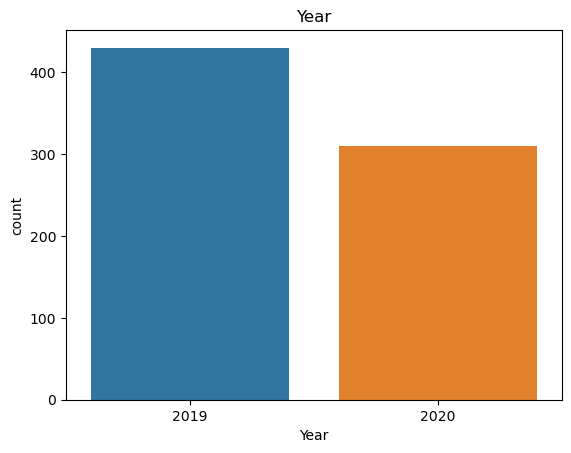

In [16]:
for i in df.drop(["Estimated Unemployment Rate (%)","Estimated Employed","Estimated Labour Participation Rate (%)"],axis=1).columns:
    sns.countplot(x=df[i])
    plt.title(i)
    plt.show()

In [17]:
num = df[["Estimated Unemployment Rate (%)","Estimated Employed","Estimated Labour Participation Rate (%)"]]
num.head()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,3.65,11999139.0,43.24
1,3.05,11755881.0,42.05
2,3.75,12086707.0,43.50
3,3.32,12285693.0,43.97
4,5.17,12256762.0,44.68


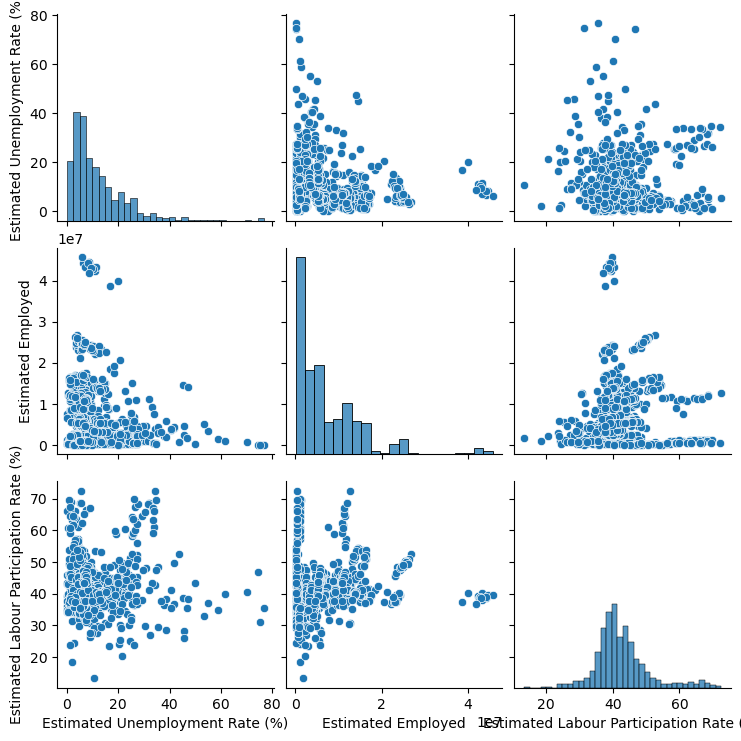

In [18]:
sns.pairplot(num)
plt.show()

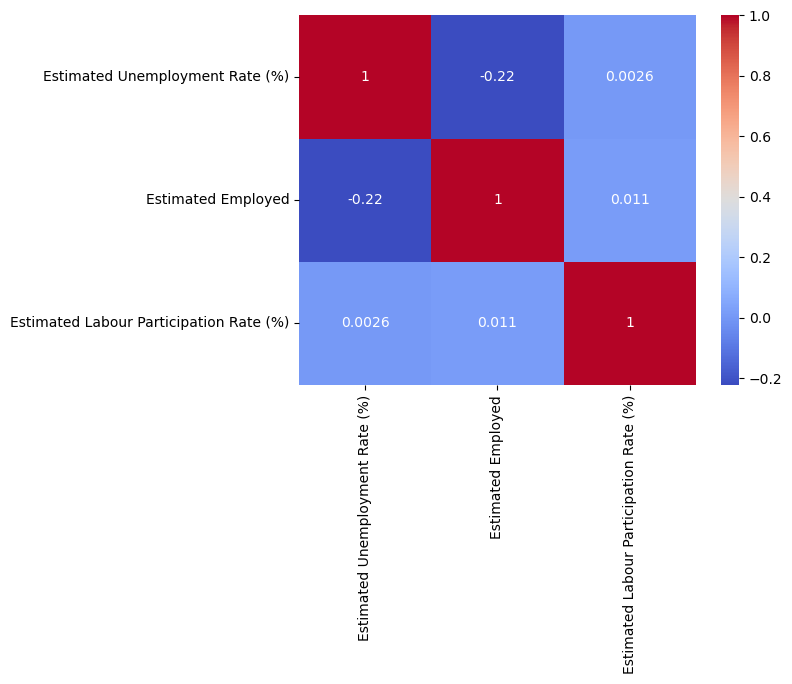

In [19]:
custom_cmap = 'coolwarm'

sns.heatmap(num.corr(), annot=True, cmap=custom_cmap)
plt.show()

In [20]:
for i in ("Region","Area"):
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

In [21]:
df.head()

,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month,Year
0,0,3.65,11999139.0,43.24,0,5,2019
1,0,3.05,11755881.0,42.05,0,6,2019
2,0,3.75,12086707.0,43.50,0,7,2019
3,0,3.32,12285693.0,43.97,0,8,2019
4,0,5.17,12256762.0,44.68,0,9,2019


In [22]:
max(df["Region"])

27

In [23]:
x = df.drop("Estimated Unemployment Rate (%)",axis=1)
y = df["Estimated Unemployment Rate (%)"]

In [24]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,random_state=10,test_size=0.20)
print('Shape of X_train: ',xtrain.shape)
print('\nShape of X_test: ',xtest.shape)
print('\nShape of Y_train: ',ytrain.shape)
print('\nShape of Y_test: ',ytest.shape)


Shape of X_train:  (592, 6)

Shape of X_test:  (148, 6)

Shape of Y_train:  (592,)

Shape of Y_test:  (148,)


In [25]:
col = pd.MultiIndex.from_product([["Train","Test"],["RMSE","MAPE"]])
modelscore = pd.DataFrame(columns=col)
modelscore.index.name = "Model Name"

In [26]:
def score_cal(model_df,model_name,model,x,y):
    xtrain,xtest,ytrain,ytest= train_test_split(x,y,random_state=10,test_size=0.20)
    xtrain,xtest,ytrain,ytest
    model.fit(xtrain,ytrain)
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    train_rmse = mean_squared_error(ytrain,ypred_train,squared=False)
    train_mape = mean_absolute_percentage_error(ytrain,ypred_train)
    test_rmse = mean_squared_error(ytest,ypred_test,squared=False)
    test_mape = mean_absolute_percentage_error(ytest,ypred_test)
    model_df.loc[model_name,:] = [train_rmse,train_mape,test_rmse,test_mape]
    return model_df

#### Linear Regression

In [27]:
lr = LinearRegression()
score_cal(modelscore,"Linear Regression",lr,x,y)

Train                             Test  \
                       RMSE                  MAPE       RMSE   
Model Name                                                     
Linear Regression  9.876611  539833912908635.4375  10.182786   

                                        
                                  MAPE  
Model Name                              
Linear Regression  1642318246795762.75

#### Decision Tree

In [28]:
dt = DecisionTreeRegressor(random_state=10)
score_cal(modelscore,"Decision Tree",dt,x,y)

Train                             Test  \
                       RMSE                  MAPE       RMSE   
Model Name                                                     
Linear Regression  9.876611  539833912908635.4375  10.182786   
Decision Tree           0.0                   0.0   9.719048   

                                        
                                  MAPE  
Model Name                              
Linear Regression  1642318246795762.75  
Decision Tree      1836434037241956.25

#### Decision Tree-Tuned

In [29]:
params = {"max_depth":range(21),"min_samples_split":range(10)}
dt = DecisionTreeRegressor(random_state=10)
gd = GridSearchCV(dt,params,cv=5)
gd.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=10),
             param_grid={'max_depth': range(0, 21),
                         'min_samples_split': range(0, 10)})

In [30]:
gd.best_params_

{'max_depth': 9, 'min_samples_split': 6}

In [31]:
dt = DecisionTreeRegressor(max_depth=9,min_samples_split=6,random_state=10)
score_cal(modelscore,"Decision Tree-Tuned",dt,x,y)

Train                             Test  \
                         RMSE                  MAPE       RMSE   
Model Name                                                       
Linear Regression    9.876611  539833912908635.4375  10.182786   
Decision Tree             0.0                   0.0   9.719048   
Decision Tree-Tuned  3.910833     82926440532458.25   8.885083   

                                          
                                    MAPE  
Model Name                                
Linear Regression    1642318246795762.75  
Decision Tree        1836434037241956.25  
Decision Tree-Tuned  1466147728111242.75

#### Random Forest

In [32]:
rf = RandomForestRegressor(random_state=10)
score_cal(modelscore,"Random Forest",rf,x,y)

Train                             Test  \
                         RMSE                  MAPE       RMSE   
Model Name                                                       
Linear Regression    9.876611  539833912908635.4375  10.182786   
Decision Tree             0.0                   0.0   9.719048   
Decision Tree-Tuned  3.910833     82926440532458.25   8.885083   
Random Forest        2.532398     171464666150788.0   6.821932   

                                          
                                    MAPE  
Model Name                                
Linear Regression    1642318246795762.75  
Decision Tree        1836434037241956.25  
Decision Tree-Tuned  1466147728111242.75  
Random Forest        684227631224590.125

#### Random Forest-Tuned

In [33]:
params = {"max_depth":range(10),"min_samples_split":range(10)}
rf = RandomForestRegressor(random_state=10)
gd = GridSearchCV(rf,params,cv=5)
gd.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10),
             param_grid={'max_depth': range(0, 10),
                         'min_samples_split': range(0, 10)})

In [34]:
gd.best_params_

{'max_depth': 9, 'min_samples_split': 1}

In [35]:
rf = RandomForestRegressor(max_depth=9,min_samples_split=1,random_state=10)
score_cal(modelscore,"Random Forest-Tuned",rf,x,y)

Train                              Test  \
                         RMSE                   MAPE       RMSE   
Model Name                                                        
Linear Regression    9.876611   539833912908635.4375  10.182786   
Decision Tree             0.0                    0.0   9.719048   
Decision Tree-Tuned  3.910833      82926440532458.25   8.885083   
Random Forest        2.532398      171464666150788.0   6.821932   
Random Forest-Tuned  3.127781  193524665332616.03125   6.853088   

                                          
                                    MAPE  
Model Name                                
Linear Regression    1642318246795762.75  
Decision Tree        1836434037241956.25  
Decision Tree-Tuned  1466147728111242.75  
Random Forest        684227631224590.125  
Random Forest-Tuned  691416391257019.125

#### AdaBoost

In [36]:
adb = AdaBoostRegressor(random_state=10)
score_cal(modelscore,"AdaBoost",adb,x,y)

Train                              Test  \
                         RMSE                   MAPE       RMSE   
Model Name                                                        
Linear Regression    9.876611   539833912908635.4375  10.182786   
Decision Tree             0.0                    0.0   9.719048   
Decision Tree-Tuned  3.910833      82926440532458.25   8.885083   
Random Forest        2.532398      171464666150788.0   6.821932   
Random Forest-Tuned  3.127781  193524665332616.03125   6.853088   
AdaBoost             7.853563    638258537323894.875   8.564806   

                                          
                                    MAPE  
Model Name                                
Linear Regression    1642318246795762.75  
Decision Tree        1836434037241956.25  
Decision Tree-Tuned  1466147728111242.75  
Random Forest        684227631224590.125  
Random Forest-Tuned  691416391257019.125  
AdaBoost              1857833886072921.5

#### Gradient Boosting

In [37]:
gdb = GradientBoostingRegressor(random_state=10)
score_cal(modelscore,"Gradient Boosting",gdb,x,y)

Train                              Test  \
                         RMSE                   MAPE       RMSE   
Model Name                                                        
Linear Regression    9.876611   539833912908635.4375  10.182786   
Decision Tree             0.0                    0.0   9.719048   
Decision Tree-Tuned  3.910833      82926440532458.25   8.885083   
Random Forest        2.532398      171464666150788.0   6.821932   
Random Forest-Tuned  3.127781  193524665332616.03125   6.853088   
AdaBoost             7.853563    638258537323894.875   8.564806   
Gradient Boosting    4.774615   280466911611612.0625   5.937294   

                                          
                                    MAPE  
Model Name                                
Linear Regression    1642318246795762.75  
Decision Tree        1836434037241956.25  
Decision Tree-Tuned  1466147728111242.75  
Random Forest        684227631224590.125  
Random Forest-Tuned  691416391257019.125  
AdaBoost              1857833886072921.5  
Gradient Boosting    818457630644746.875

In [38]:
modelscore.iloc[:,2]-modelscore.iloc[:,0]

Model Name
Linear Regression      0.306175
Decision Tree          9.719048
Decision Tree-Tuned    4.974249
Random Forest          4.289534
Random Forest-Tuned    3.725307
AdaBoost               0.711243
Gradient Boosting       1.16268
dtype: object

In [39]:
modelscore.iloc[:,3]-modelscore.iloc[:,1]

Model Name
Linear Regression       1102484333887127.25
Decision Tree           1836434037241956.25
Decision Tree-Tuned      1383221287578784.5
Random Forest           512762965073802.125
Random Forest-Tuned     497891725924403.125
AdaBoost                 1219575348749026.5
Gradient Boosting      537990719033134.8125
dtype: object

##### From all the above models taken, AdaBoost gives the better result. As we can see minimum error in all three cases(train,test and overall). So we can conclude  using AdaBoost for future predictions.